In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.



In [64]:
def get_lower_and_upper_bounds(col, multiplier=1.5):
    # IQR: q3 - q1
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (multiplier * iqr)
    upper_fence = q3 + (multiplier * iqr)
    return df[(df[col] < lower_fence) | (df[col] > upper_fence)]

def get_lower_bounds(col, multiplier=1.5):
    # IQR: q3 - q1
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (multiplier * iqr)
    upper_fence = q3 + (multiplier * iqr)
    return df[(df[col] < lower_fence)]

def get_upper_bounds(col, multiplier=1.5):
    # IQR: q3 - q1
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (multiplier * iqr)
    upper_fence = q3 + (multiplier * iqr)
    return df[(df[col] > upper_fence)]


## 1. Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [65]:
df=pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [66]:
df.columns=df.columns.str.lower()

In [67]:
for col in df[['temperature','rainfall','flyers','price','sales']]:
    print (col)
    print(get_lower_and_upper_bounds(col))
    print('--------')

temperature
         date       day  temperature  rainfall  flyers  price  sales
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
--------
rainfall
         date        day  temperature  rainfall  flyers  price  sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5 

#### the temperature outliers has a entry of 212 degrees so that is an error. Nothing stands out with the rainfall data, but the flyers has a negative 38 for a value which is impossible.  There is an entry with sales that is over 500 and this should be investigated.

## Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [68]:
for col in df[['temperature','rainfall','flyers','price','sales']]:
    print (col, "lower bounds")
    print(get_lower_bounds(col,multiplier=3))
    print('--------')

temperature lower bounds
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
--------
rainfall lower bounds
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
--------
flyers lower bounds
         date      day  temperature  rainfall  flyers  price  sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
--------
price lower bounds
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
--------
sales lower bounds
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
--------


### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [69]:
for col in df[['temperature','rainfall','flyers','price','sales']]:
    print (col, "upper bounds")
    print(get_upper_bounds(col,multiplier=3))
    print('--------')

temperature upper bounds
       date       day  temperature  rainfall  flyers  price  sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
--------
rainfall upper bounds
         date      day  temperature  rainfall  flyers  price  sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
--------
flyers upper bounds
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
--------
price upper bounds
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
--------
sales upper bounds
       date       day  temperature  rainfall  flyers  price  sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


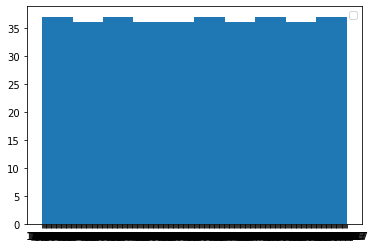

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


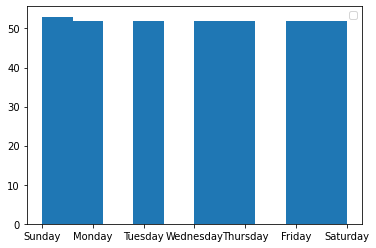

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


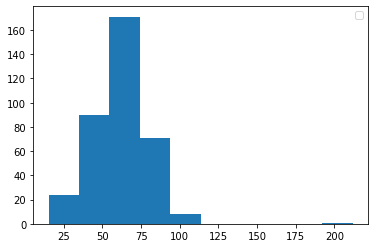

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


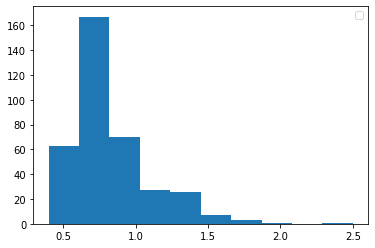

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


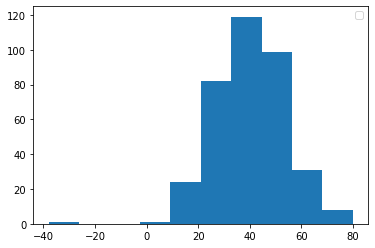

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


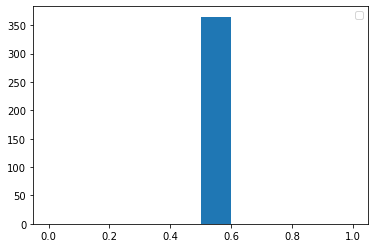

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


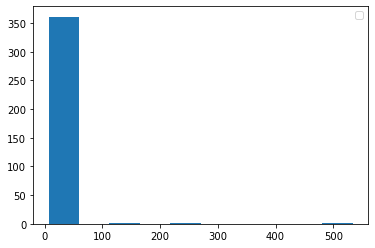

In [70]:
for col in df.columns:
    plt.hist(df[[col]])
    plt.title= col
    plt.legend()
    plt.show()

In [73]:
#only the flyers and rainfall look normally distributed


for col in df.columns[3:]:
    # (col + 'Z_score')= 
    df[col+' z_score']=((df[col]-df[col].mean())/ df[col].std())




In [79]:
# list of all the rows that have either rainfall or flyers z-score over 2

df[ (df['rainfall z_score'].abs() >= 2) | (df['flyers z_score'].abs() >= 2)]

,date,day,temperature,rainfall,flyers,price,sales,rainfall z_score,flyers z_score,price z_score,sales z_score
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,4.286488,-1.820927,NaN,-0.577281
5,1/6/17,Friday,25.3,1.54,23,0.5,11,2.606983,-1.240647,NaN,-0.544968
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,2.606983,-1.530787,NaN,-0.480344
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,2.606983,-1.240647,NaN,-0.512656
15,1/16/17,Monday,30.6,1.67,24,0.5,12,3.081626,-1.168112,NaN,-0.512656
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,2.205363,-1.023042,NaN,-0.448032
19,1/20/17,Friday,31.6,1.43,20,0.5,12,2.205363,-1.458252,NaN,-0.512656
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,2.606983,-1.458252,NaN,-0.512656
166,6/16/17,Friday,99.3,0.47,77,0.5,41,-1.299691,2.676244,NaN,0.424395
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,-1.044114,2.168499,NaN,0.295147


## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [80]:
# list of all the rows that have either a rainfall or flyers z score greater than 3

df[ (df['rainfall z_score'].abs() >= 3) | (df['flyers z_score'].abs() >= 3)]

,date,day,temperature,rainfall,flyers,price,sales,rainfall z_score,flyers z_score,price z_score,sales z_score
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,4.286488,-1.820927,NaN,-0.577281
15,1/16/17,Monday,30.6,1.67,24,0.5,12,3.081626,-1.168112,NaN,-0.512656
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.452836,-5.665283,NaN,-0.254159
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,3.629291,-2.111067,NaN,-0.577281
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,3.629291,-1.820927,NaN,-0.544968
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,6.112037,-2.256137,NaN,-0.674217
